<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%8C%E6%9C%80%E9%AB%98%E3%81%AE%E5%AD%A6%E5%95%8F%E3%81%A7%E3%81%82%E3%82%8B%E3%80%8C%E6%95%B0%E5%AD%A6%E7%B7%A8%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%matplotlib inline
%precision 3

import pickle
import statsmodels.formula.api as smf
import pystan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
from matplotlib import colors as mcolors
from pystan import StanModel
import pickle

import seaborn as sns
import sys
import math
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from scipy.stats import norm
import itertools

from statsmodels.formula.api import glm
import statsmodels.api as sm

sns.set()

import os

path = os.getcwd()

try:
    os.chdir(path + "/drive/My Drive/統計学が最強の学問である")
except:
    pass

os.getcwd()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/content/drive/My Drive/統計学が最強の学問である'

In [3]:
import scipy as sp
print("Numpy",np.__version__)
print("Scipy",sp.__version__)

Numpy 1.18.5
Scipy 1.4.1


# 統計学が最強の学問である［数学編］

In [4]:
import sympy
x =sympy.Symbol('x')
y = sympy.Symbol('y')
a,b,c,p,q = sympy.symbols('a b c p q')

print(type(a))

<class 'sympy.core.symbol.Symbol'>


In [5]:
y1 = 12-5*x-y
y2 = 3-0.5*x-y

sympy.solve([y1,y2])


{x: 2.00000000000000, y: 2.00000000000000}

## 二項定理と組み合わせの数

(-10.000, 10.000)

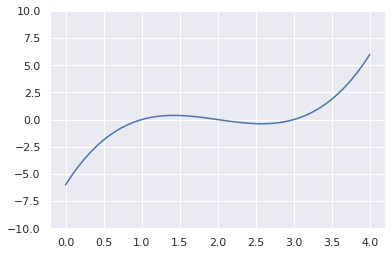

In [6]:
y = lambda x: -6+11*x-6*x**2+x**3
x = np.linspace(0,4,50)

plt.plot(x,y(x))
plt.ylim(-10,10)

(-10.000, 10.000)

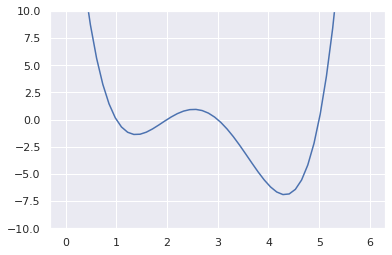

In [7]:
y = lambda x: 30-61*x+41*x**2-11*x**3+x**4
x = np.linspace(0,6,50)

plt.plot(x,y(x))
plt.ylim(-10,10)

In [8]:
x =sympy.Symbol('x')
y = sympy.Symbol('y')

print(sympy.expand((x+y)**2))
print(sympy.expand((x+y)**3))

print("16.3")
print("(x+y)**4 =  ", sympy.expand((x+y)**4))

x**2 + 2*x*y + y**2
x**3 + 3*x**2*y + 3*x*y**2 + y**3
16.3
(x+y)**4 =   x**4 + 4*x**3*y + 6*x**2*y**2 + 4*x*y**3 + y**4


In [9]:
list(itertools.product('xy',repeat=2))

[('x', 'x'), ('x', 'y'), ('y', 'x'), ('y', 'y')]

In [10]:
# 図表 3-4

list(itertools.product('xy',repeat=3))

[('x', 'x', 'x'),
 ('x', 'x', 'y'),
 ('x', 'y', 'x'),
 ('x', 'y', 'y'),
 ('y', 'x', 'x'),
 ('y', 'x', 'y'),
 ('y', 'y', 'x'),
 ('y', 'y', 'y')]

In [11]:
list(itertools.combinations_with_replacement('xy',3))

[('x', 'x', 'x'), ('x', 'x', 'y'), ('x', 'y', 'y'), ('y', 'y', 'y')]

In [12]:
# 図表 3-5
list(itertools.product('xy',repeat=4))

[('x', 'x', 'x', 'x'),
 ('x', 'x', 'x', 'y'),
 ('x', 'x', 'y', 'x'),
 ('x', 'x', 'y', 'y'),
 ('x', 'y', 'x', 'x'),
 ('x', 'y', 'x', 'y'),
 ('x', 'y', 'y', 'x'),
 ('x', 'y', 'y', 'y'),
 ('y', 'x', 'x', 'x'),
 ('y', 'x', 'x', 'y'),
 ('y', 'x', 'y', 'x'),
 ('y', 'x', 'y', 'y'),
 ('y', 'y', 'x', 'x'),
 ('y', 'y', 'x', 'y'),
 ('y', 'y', 'y', 'x'),
 ('y', 'y', 'y', 'y')]

#### 順列

In [13]:
# 図表 3-6
list(itertools.permutations('1234',2))

[('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('2', '1'),
 ('2', '3'),
 ('2', '4'),
 ('3', '1'),
 ('3', '2'),
 ('3', '4'),
 ('4', '1'),
 ('4', '2'),
 ('4', '3')]

In [14]:
# 図表 3-7
list(itertools.permutations('abc',3))

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [15]:
# 階乗の計算

import math

def fact(n):
  if n == 0: return 1
  return n*fact(n-1)

print(fact(3))

print(math.factorial(3))

6
6


### 二項定理の計算

In [16]:
def calc(k):
  return [math.factorial(k)/(math.factorial(i)*math.factorial(k-i)) for i in range(k+1)]

calc(4)

[1.000, 4.000, 6.000, 4.000, 1.000]

In [17]:
from scipy.special import comb

n = 4

print([comb(n,i,exact=True ) for i in range(n+1)])

[1, 4, 6, 4, 1]


## 二項定理と組み合わせの数から複雑な確率計算へ

In [18]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


図表　3-8


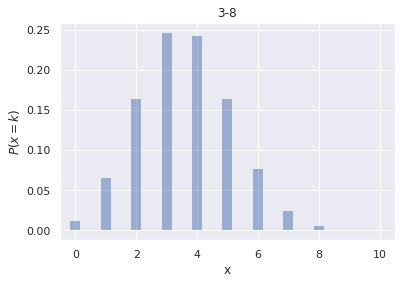

In [19]:
from scipy.stats import binom

p = 0.36
N = 10

k = np.arange(N+1)

fig, ax = plt.subplots(1,1)
ax.vlines(k,0,binom.pmf(k,N,p),color='b',lw=10,alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('$ P(x=k) $')
ax.set_title("3-8")

print("図表　3-8")

plt.savefig('./out/3-8.png')

In [20]:
k = 0
binom.pmf(k,N,p)

0.012

In [21]:
k = 1
binom.pmf(k,N,p)

0.065

In [22]:
k = 2
binom.cdf(k,N,p)

0.241

# 掛け算と割り算を楽にする指数の考え方

図表 3-9：底が２の時の指数関数グラフ


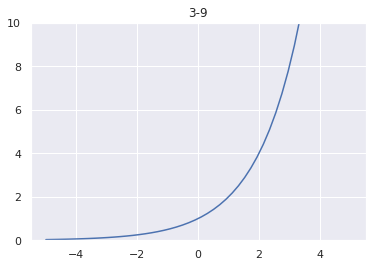

In [23]:
y = lambda x: 2**x

x = np.linspace(-5,5,50)
plt.plot(x,y(x))
plt.title('3-9')
plt.ylim(0,10)

print("図表 3-9：底が２の時の指数関数グラフ")

図表 3-10：底が1/2のときの指数関数グラフ


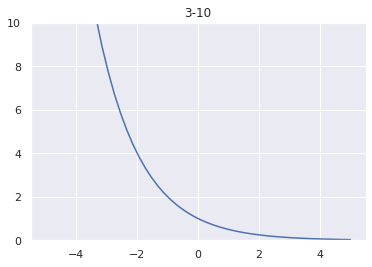

In [24]:
y = lambda x: 1/2**x

x = np.linspace(-5,5,50)
plt.plot(x,y(x))
plt.title('3-10')
plt.ylim(0,10)

print("図表 3-10：底が1/2のときの指数関数グラフ")

## 計算機を作り始めた男

In [25]:
x = np.arange(11,101)/10
df = pd.DataFrame({'x':x,'log10(x)': np.log10(x)})

In [26]:
df[df['x'].isin([6,7.8])]

,x,log10(x)
49,6.0,0.778151
67,7.8,0.892095


In [27]:
df[df['x'].isin([2,1.4])]

,x,log10(x)
3,1.4,0.146128
9,2.0,0.301030


In [28]:
df.query('x==[2,1.4]')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,x,log10(x)
3,1.4,0.146128
9,2.0,0.301030


In [29]:
import matplotlib
print(matplotlib.matplotlib_fname())

/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


## 対数の性質と計算のためのルール

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


図表 3-14 ：底が 2 の時の対数関数グラフ


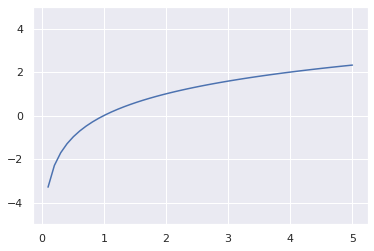

In [30]:
y = lambda x: np.log2(x)
x = np.linspace(0,5,50)

plt.plot(x,y(x))
plt.ylim(-5,5)

print("図表 3-14 ：底が 2 の時の対数関数グラフ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


図表 3-14 ：底が 0.5 の時の対数関数グラフ


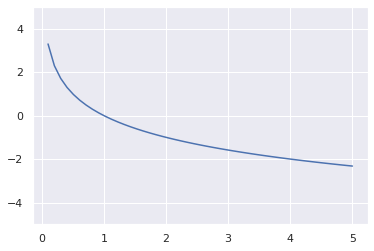

In [31]:
y = lambda x: np.log(x)/np.log(0.5)
x = np.linspace(0,5,50)

plt.plot(x,y(x))
plt.ylim(-5,5)

print("図表 3-14 ：底が 0.5 の時の対数関数グラフ")

$ x = y $ <=> $ log_a x = log_a y $

$ log_a xy = log_a x + log_a y $

$ log_a \dfrac{x}{y} = log_a x - log_a y $

$ log_a x^n = n log_a x $

$ log_a \sqrt{x} = log_a x^\frac{1}{2}  = \frac{1}{2} log_a x $

$ log_a x = \dfrac{log_b x}{log_b a} $

## ネイピア数 $ e $ の意味とロジスティック回帰

$ \displaystyle e = \lim_{x \to \infty} \left( 1+ \dfrac{1}{n} \right)^n $ 

$ log \dfrac{p}{1-p} = a + bx $

図表 3-15


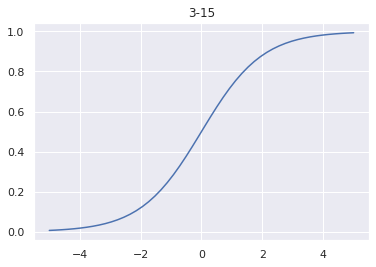

In [32]:
y = lambda x: 1/(1+np.exp(-x))
x = np.linspace(-5,5,50)

plt.plot(x,y(x))
plt.title('3-15')

print("図表 3-15")

# 三平方の定理とデータの「距離」

In [33]:
cities = np.array([[43.062083, 141.354389], # 札幌
                   [38.268056, 140.869722], # 仙台
                   [35.689472, 139.69175], # 東京
                   [35.181389, 136.906389], # 名古屋
                   [34.69375, 135.502111], # 大阪
                   [34.38525, 132.455306], # 広島
                   [33.590139, 130.401722], # 福岡
                   [26.213083, 127.678056]]) # 那覇

cities

array([[ 43.062, 141.354],
       [ 38.268, 140.87 ],
       [ 35.689, 139.692],
       [ 35.181, 136.906],
       [ 34.694, 135.502],
       [ 34.385, 132.455],
       [ 33.59 , 130.402],
       [ 26.213, 127.678]])

In [34]:
all_diffs = np.expand_dims(cities,axis=1) - np.expand_dims(cities,axis=0)
digree_distance = np.sqrt(np.sum(all_diffs**2,axis=-1))
distance = (101*digree_distance).astype(np.int32)
distance

array([[   0,  486,  763,  913, 1031, 1255, 1462, 2191],
       [ 486,    0,  286,  507,  651,  935, 1158, 1804],
       [ 763,  286,    0,  285,  434,  742,  961, 1545],
       [ 913,  507,  285,    0,  150,  456,  676, 1299],
       [1031,  651,  434,  150,    0,  309,  527, 1165],
       [1255,  935,  742,  456,  309,    0,  222,  956],
       [1462, 1158,  961,  676,  527,  222,    0,  794],
       [2191, 1804, 1545, 1299, 1165,  956,  794,    0]], dtype=int32)

In [35]:
a = cities[1]
b = cities[0]
np.linalg.norm(a-b)*101

486.665

In [36]:
pd.DataFrame(distance, index=["札幌","仙台","東京","名古屋","大阪","広島","福岡","那覇"],columns=["札幌","仙台","東京","名古屋","大阪","広島","福岡","那覇"])

,札幌,仙台,東京,名古屋,大阪,広島,福岡,那覇
札幌,0,486,763,913,1031,1255,1462,2191
仙台,486,0,286,507,651,935,1158,1804
東京,763,286,0,285,434,742,961,1545
名古屋,913,507,285,0,150,456,676,1299
大阪,1031,651,434,150,0,309,527,1165
広島,1255,935,742,456,309,0,222,956
福岡,1462,1158,961,676,527,222,0,794
那覇,2191,1804,1545,1299,1165,956,794,0


In [37]:
array_ = np.array(cities, dtype=int)[1:3,:1]
array_.shape

(2, 1)

In [38]:
np.expand_dims(array_,axis=1).shape

(2, 1, 1)

In [39]:
np.expand_dims(array_,axis=0) .shape

(1, 2, 1)

In [40]:
np.expand_dims(array_,axis=1) - np.expand_dims(array_,axis=0) 

array([[[ 0],
        [ 3]],

       [[-3],
        [ 0]]])

In [41]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [42]:
a_ = np.expand_dims(a,axis=0)
a_

array([[[0, 1],
        [2, 3],
        [4, 5]]])

In [43]:
b = np.expand_dims(a,axis=1)
b

array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]])

In [44]:
c = a_-b
c

array([[[ 0,  0],
        [ 2,  2],
        [ 4,  4]],

       [[-2, -2],
        [ 0,  0],
        [ 2,  2]],

       [[-4, -4],
        [-2, -2],
        [ 0,  0]]])

In [45]:
np.sqrt(np.sum(c**2,axis=-1))

array([[0.   , 2.828, 5.657],
       [2.828, 0.   , 2.828],
       [5.657, 2.828, 0.   ]])

## 幾何学に対する代数の力業


In [46]:
1/2*12*14*np.sin(1/6*np.pi)

42.000

In [47]:
np.sin(1/6*np.pi)

0.500


## 拡張された三角関数の定義

In [48]:
d = np.arange(0,370,30)
d.dtype

dtype('int64')

In [49]:
r = np.radians(d/np.pi)

r

array([0.   , 0.167, 0.333, 0.5  , 0.667, 0.833, 1.   , 1.167, 1.333,
       1.5  , 1.667, 1.833, 2.   ])

In [50]:
from fractions import Fraction
f_ =np.zeros(len(d)).astype(str)
print(f_)

for i in np.arange(len(d)):
  f = Fraction(str(r[i]))
  f_[i] = str(f.limit_denominator(50))
f_


['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0']


array(['0', '1/6', '1/3', '1/2', '2/3', '5/6', '1', '7/6', '4/3', '3/2',
       '5/3', '11/6', '2'], dtype='<U32')

In [51]:
df = pd.DataFrame({'度数法':d,'弧度法':f_})

In [52]:
print("図表 3-32")

df['sin'] = np.sin(np.radians(d))
df['cos'] = np.cos(np.radians(d))
df

図表 3-32


,度数法,弧度法,sin,cos
0,0,0,0.000000e+00,1.000000e+00
1,30,1/6,5.000000e-01,8.660254e-01
2,60,1/3,8.660254e-01,5.000000e-01
3,90,1/2,1.000000e+00,6.123234e-17
4,120,2/3,8.660254e-01,-5.000000e-01
5,150,5/6,5.000000e-01,-8.660254e-01
6,180,1,1.224647e-16,-1.000000e+00
7,210,7/6,-5.000000e-01,-8.660254e-01
8,240,4/3,-8.660254e-01,-5.000000e-01
9,270,3/2,-1.000000e+00,-1.836970e-16


# 統計学と機械学習のための $ \Sigma $ 、ベクトル、行列


## たくさんの数をまとめて書きたい

In [53]:
n = np.array([98,99,96,91,99,91,94,93,99,90])
c = 90
np.mean(n)

95.000

In [54]:
n-c

array([8, 9, 6, 1, 9, 1, 4, 3, 9, 0])

In [55]:
c+np.mean(n-c)

95.000

In [56]:
pd.DataFrame({'調査協力者':[str(i+1)+'人目' for i in np.arange(len(n))],'満足度':n, })

,調査協力者,満足度
0,1人目,98
1,2人目,99
2,3人目,96
3,4人目,91
4,5人目,99
5,6人目,91
6,7人目,94
7,8人目,93
8,9人目,99
9,10人目,90


## $ \Sigma $ より高密度に書くためのベクトル入門

In [57]:
val = np.array([0.0,0.0,0.0])
val[0] = 2.1
val

array([2.1, 0. , 0. ])

In [58]:
a = np.array([1,4])
b = np.array([5,2])
c = np.array([1,4])

-a+b+c

array([5, 2])

In [59]:
-a+b

array([ 4, -2])

## ベクトルの内積と $ \Sigma $ の関係

In [60]:
sp.linalg.norm(b)

5.385

In [61]:
a@b

13

In [62]:
b@a

13

In [63]:
a@(b+c) == a@b+a@c

True

In [64]:
sum([(a[i]*b[i]) for i in np.arange(len(a))])

13

## 統計学で内積の使い方

相関係数 $ = \displaystyle \frac{\Sigma_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\Sigma_{i=1}^n (x_i - \bar{x})^2 }\sqrt{\Sigma_{i=1}^n (y_i - \bar{y})^2}} $

In [65]:
x = np.array([85,73,52,88,98,81,92,87,96,88])
y = np.array([8,6,2,2,9,7,9,8,5,4])
df = pd.DataFrame({'調査協力者':[str(i+1)+'人目' for i in np.arange(len(x))],'満足度(x)':x, '購買回数（y）':y })
df

,調査協力者,満足度(x),購買回数（y）
0,1人目,85,8
1,2人目,73,6
2,3人目,52,2
3,4人目,88,2
4,5人目,98,9
5,6人目,81,7
6,7人目,92,9
7,8人目,87,8
8,9人目,96,5
9,10人目,88,4


In [66]:
df.corr()

,満足度(x),購買回数（y）
満足度(x),1.000000,0.509375
購買回数（y）,0.509375,1.000000


In [67]:
print('図表 4-9')

df['満足度-平均値'] = df['満足度(x)']- df['満足度(x)'].mean()
df['購買回数-平均値'] = df['購買回数（y）'] - df['購買回数（y）'].mean()
df['pq'] = df['満足度-平均値']*df['購買回数-平均値']
df['p**2'] = df['満足度-平均値']**2
df['q**2'] = df['購買回数-平均値']**2
df

図表 4-9


,調査協力者,満足度(x),購買回数（y）,満足度-平均値,購買回数-平均値,pq,p**2,q**2
0,1人目,85,8,1.0,2.0,2.0,1.0,4.0
1,2人目,73,6,-11.0,0.0,-0.0,121.0,0.0
2,3人目,52,2,-32.0,-4.0,128.0,1024.0,16.0
3,4人目,88,2,4.0,-4.0,-16.0,16.0,16.0
4,5人目,98,9,14.0,3.0,42.0,196.0,9.0
5,6人目,81,7,-3.0,1.0,-3.0,9.0,1.0
6,7人目,92,9,8.0,3.0,24.0,64.0,9.0
7,8人目,87,8,3.0,2.0,6.0,9.0,4.0
8,9人目,96,5,12.0,-1.0,-12.0,144.0,1.0
9,10人目,88,4,4.0,-2.0,-8.0,16.0,4.0


In [68]:
df['p**2'].sum()

1600.000

In [69]:
df['q**2'].sum()

64.000

In [70]:
np.sqrt(df['p**2'].sum()*df['q**2'].sum())

320.000

In [71]:
df['pq'].sum()

163.000

In [72]:
df['pq'].sum()/np.sqrt(df['p**2'].sum()*df['q**2'].sum())

0.509

図表 4-10


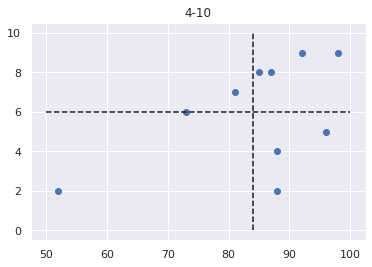

In [73]:
plt.scatter(x,y)
plt.hlines(y=y.mean(),xmin=50,xmax=100,linestyles='--')
plt.vlines(x=x.mean(),ymin=0,ymax=10,linestyles='--')
plt.title('4-10')

print("図表 4-10")

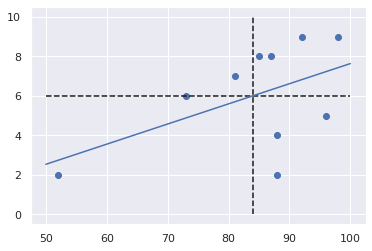

In [74]:
A = np.vstack((x,np.ones(len(x)))).T
v = y.T

u, residuals, rank, s = np.linalg.lstsq(A,v,rcond=None)

xx = np.linspace(50,100,50)
yy = xx*u[0]+u[1]

plt.scatter(x,y)
plt.plot(xx,yy)
plt.hlines(y=y.mean(),xmin=50,xmax=100,linestyles='--')
plt.vlines(x=x.mean(),ymin=0,ymax=10,linestyles='--')

相関係数  $ = cos\theta = \dfrac{pq}{\| p \| \| q \|} $

$ =  \dfrac{p^T q}{\sqrt{p^T p}\sqrt{q^T q}} $

相関係数とは、 x y それぞれの平均値からのズレをベクトル p q としたときに、これらのベクトルのなす角の cos である  

これらのベクトルの内積をそれぞれのベクトルの大きさで割ったもの

## ベクトル以上に高密度な書き方

行列を使って回帰分析を表してみよう

$ y = a + bx + \epsilon $

$ y = X \beta + \epsilon $



## 行列計算同士の四則演算



## 行列をひっくり返す転置行列と正規方程式の考え方

$ (A^T)^T = A $

$ (A+B)^T = A^T + B^T $

$ (cA)^T = c A^T $

$ (AB)^T = B^T A^T $

$ (A^{-1})^T = (A^T)^{-1} $



In [75]:
A = np.arange(4*4).reshape(4,-1)
B = np.arange(10,10+4*4).reshape(4,-1)
B

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21],
       [22, 23, 24, 25]])

In [76]:
(A.T).T == A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [77]:
(A+B).T == B.T+A.T

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [78]:
c = 5
(c*A).T == c*A.T

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [79]:
(A*B).T == B.T*A.T

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [80]:
A = np.arange(1,5).reshape(2,-1)
np.linalg.det(A)

-2.000

In [81]:
np.linalg.inv(A).T

array([[-2. ,  1.5],
       [ 1. , -0.5]])

In [82]:
np.linalg.inv(A.T)

array([[-2. ,  1.5],
       [ 1. , -0.5]])

In [83]:
np.linalg.inv(A).T == np.linalg.inv(A.T)

array([[False, False],
       [False, False]])

In [84]:
np.isclose(np.linalg.inv(A).T, np.linalg.inv(A.T))

array([[ True,  True],
       [ True,  True]])

In [85]:
np.isclose((np.linalg.inv(A).T @ A.T),np.eye(2))

array([[ True,  True],
       [ True,  True]])

In [86]:
np.isclose(A.T @ np.linalg.inv(A).T , np.eye(2))

array([[ True,  True],
       [ True,  True]])

In [87]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

# 統計学と機械学習のための微分・積分

## 関数の「ちょうどいいところ」を探して

統計学と機械学習のための微分入門

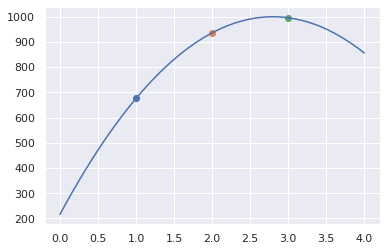

In [88]:
y = lambda x: 216+560*x-100*x**2
x = np.linspace(1.0,2.0,11)
xx = np.linspace(0,4,50)
x_ = [1,2,3]
plt.plot(xx,y(xx))

for xx_ in x_:
  plt.scatter(xx_,y(xx_))

In [89]:
df = pd.DataFrame({'x':x,'y':y(x)})


In [90]:
df['delta_x'] = df['x'].diff().cumsum()
df['delta_y'] = df['y'].diff().cumsum()
df['傾き'] = df['delta_y']/df['delta_x']
df

,x,y,delta_x,delta_y,傾き
0,1.0,676.0,NaN,NaN,NaN
1,1.1,711.0,0.1,35.0,350.0
2,1.2,744.0,0.2,68.0,340.0
3,1.3,775.0,0.3,99.0,330.0
4,1.4,804.0,0.4,128.0,320.0
5,1.5,831.0,0.5,155.0,310.0
6,1.6,856.0,0.6,180.0,300.0
7,1.7,879.0,0.7,203.0,290.0
8,1.8,900.0,0.8,224.0,280.0
9,1.9,919.0,0.9,243.0,270.0


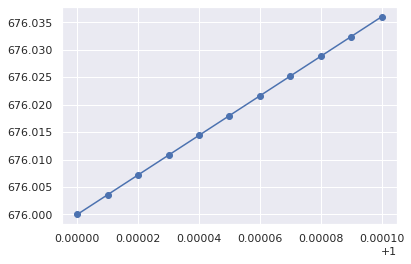

In [91]:
x = np.linspace(1.0,1.0001,11)
plt.plot(x,y(x))
plt.scatter(x,y(x))

In [92]:
df = pd.DataFrame({'x':x,'y':y(x)})
df['delta_x'] = df['x'].diff().cumsum()
df['delta_y'] = df['y'].diff().cumsum()
df['傾き'] = df['delta_y']/df['delta_x']
df

,x,y,delta_x,delta_y,傾き
0,1.00000,676.000000,NaN,NaN,NaN
1,1.00001,676.003600,0.00001,0.003600,359.999
2,1.00002,676.007200,0.00002,0.007200,359.998
3,1.00003,676.010800,0.00003,0.010800,359.997
4,1.00004,676.014400,0.00004,0.014400,359.996
5,1.00005,676.018000,0.00005,0.018000,359.995
6,1.00006,676.021600,0.00006,0.021600,359.994
7,1.00007,676.025200,0.00007,0.025200,359.993
8,1.00008,676.028799,0.00008,0.028799,359.992
9,1.00009,676.032399,0.00009,0.032399,359.991


## n 次元関数の微分の仕方

$ \dfrac{d}{dx} x^n = n x^{n-1} $

二つの関数を足してから微分しも、それぞれ微分してから足しても良い

$ \dfrac{d}{dx} (f(x)+g(x)) = \dfrac{d}{dx} f(x) + \dfrac{d}{dx} g(x) $

関数を定数倍してから微分しても、微分してから定数倍しても良い

$ \dfrac{d}{dx} (a f(x)) = a \dfrac{d}{dx} f(x) $

$ \dfrac{d}{dx} (a f(x)+b g(x)) = a \dfrac{d}{dx} f(x) + b \dfrac{d}{dx} g(x) $

関数同士の掛け算の微分は、それぞれ「元の関数と相手のどう関数の掛け算」を足したものになる

$ \dfrac{d}{dx} (f(x) g(x)) = f(x) \dfrac{d}{dx} g(x) + g(x) \dfrac{d}{dx} f(x) $

関数同士の割り算の微分は、それぞれ「元の関数と相手のどう関数の掛け算」を引いたもの（引き算の順番に注意）を「分母の方の関数の２乗で割ったものになる

$ \dfrac{d}{dx} \left( \dfrac{g(x)}{f(x)} \right) = \dfrac{ f(x) \dfrac{d}{dx} g(x) - g(x) \dfrac{d}{dx} f(x)}{(f(x))^2} $





(-10.000, 10.000)

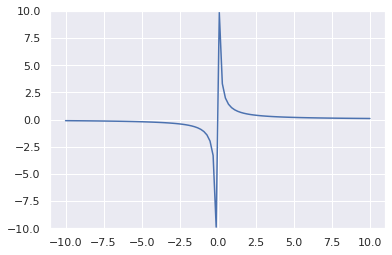

In [93]:
y = lambda x: x**(-1)
x = np.linspace(-10,10,100)
plt.plot(x,y(x))
plt.ylim(-10,10)

## 統計学と機械学習で積分を必要とするところ

連続値に対する確率密度関数

## 小さく分けていっぱい集めて

統計学と機械学習のための積分の基礎

ある関数 $ F(x) $ を x で微分した場合に $ f(x) $ となるとき $ F(x) $ は $ f(x) $ にとって原始関数と呼ばれ、逆に $ f(x) $ の不定積分を求めると　$ F(x) + C $ となる

$ f(x) $ の不定積分が $ F(x) + C $ なら、「 a から b までの定積分」は $ F(b) - F(a) $ で求められる

定積分の「 a から b まで」という積分区間を「 a から c までと c から b まで」というように分割して考えるのは自由だが「 b から a まで」と逆向きに考える場合はマイナスをつけて考える

積分記号の中身を定数倍してから積分を計算しても、積分の計算をしてから定数倍してもどちらでも良い

積分記号の中身を足し合わせてから積分の計算をしても、積分の計算をしてから足し合わせてもどっちでも良い

基本的な x の n 乗の不定積分

$ \int x^n dx = \dfrac{1}{n+1} x^{n+1} + C $

関数同士の掛け算の積分

$ \int (f(x) G(x) dx = F(x) G(x) - \int (F(x) g(x) dx $



In [94]:
x = sympy.symbols('x')
t = sympy.symbols('t')

f = -1/18 + (1/18)*x 
g = 4/9 - (2/45)*x
sympy.integrate(f,(x,1,5))

0.444444444444444

In [95]:
g_ = sympy.integrate(g,(x,5,t)) + sympy.integrate(f,(x,1,5)) -0.95
g_

-0.0222222222222222*t**2 + 0.444444444444444*t - 2.17222222222222

In [96]:
sympy.solve(g_,t)

[8.49999999999997, 11.5000000000000]

## 微積分記号に対する操作とライプニッツ記号の意味

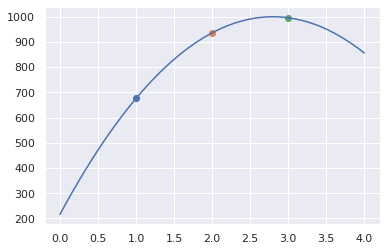

In [97]:
y = lambda x: -100*(x-2.8)**2+1000
x = np.linspace(0,4,50)
x_ = [1,2,3]

plt.plot(x,y(x))

for xx_ in x_:
  plt.scatter(xx_,y(xx_))

### 「ユーザー数の伸び」「 y を t で微分したもの」は、 y の値自体と「全潜在顧客のうちまだユーザーとなっていない子供の人数」の両方に比例する

$ \dfrac{dy}{dt} = ay(N-y) $

$ \dfrac{1}{y(N-y)} dy = a dt $

$ \dfrac{1}{N} \left( \dfrac{1}{y} + \dfrac{1}{N-y} \right) dy = a dt $

$ \dfrac{1}{N} \left( \displaystyle \int \dfrac{1}{y} dy + \int \dfrac{1}{N-y} dy \right) = a \displaystyle \int 1 dt $

定石

$ \dfrac{1}{y} + \dfrac{1}{N-y} = \dfrac{N-y}{y(N-y)} + \dfrac{y}{y(N-y)} = \dfrac{N-y+y}{y(N-y} = \dfrac{N}{y(N-y)} $






$ u = N-y $ <=> $ y = N - u $

$ \displaystyle \int \dfrac{1}{N-y} dy = \displaystyle \int \dfrac{1}{u} \dfrac{dy}{du} du = \int \dfrac{1}{u} \cdot (-1) du = -log|u| + C = -log|N-y| + C $

$ \dfrac{1}{N} (log y + C_1 -log(N-y) + C_2 = at + C_3    $

 <=> $ logy+C_1-log(N-y)+C_2 = Nat + NC_3  $

 <=> $ logy -log(N-y) = Nat + C $

 <=> $ log \dfrac{y}{N-y} = Nat + C $

 <=> $ \displaystyle y = e^{Nat + c} (N-y) = N e^{Nat+C} - e^{Nat+C} y $

 <=> $ \displaystyle e^{Nat+C} y + y = N e^{Nat+c} $

 <=> $ (e^{} + 1) \cdot y = Ne^{Nat+C} $

 <=> $ y = N \cdot \dfrac{e^{Nat+C}}{e^{Nat+C} + 1} = N \cdot \dfrac{1}{1+ \dfrac{1}{e^{Nat+C}}} $

 <=> $ y = N \cdot \dfrac{1}{1+e^{-(Nat+C)}} $

 




## 指数関数・対数関数の微分／積分とネイピア数の意味

$ \dfrac{d}{dx} e^x = e^x $

底が e の指数関数は微分しても積分しても同じ関数になる

底が e の対数関数を微分すると　$ \dfrac{1}{x} $ になり、逆に n 次関数のルールで例外だった「マイナス一乗の積分」は　$ log|x| $ になる

$ \dfrac{d}{dx} log_e x  = \dfrac{1}{x} $

$ \displaystyle \int x^{-1} dx = \int \frac{1}{x} dx = log_e | x | + C $



底が e でない指数間酢を微分した場合、もとの関数を $ log_e a $ 倍したものになり、積分を求める場合はもとの関数を $ log_e a $ で割ったものになる

$ \dfrac{d}{dx} a^x = a^x log_e a $

$ \displaystyle \int a^x dx = \dfrac{a^x}{log_e a} + C $

底が e でない対数関数を微分すると $ \dfrac{1}{x} $ を $ log_e a $ で割ったものになる

$ \dfrac{d}{dx} log_a x = \dfrac{1}{log_e a} \dfrac{1}{x} $

底が e の対数関数の積分

$ \int log_e x = x log x -x + C $

$ \displaystyle \int \dfrac{1}{y} dy = log|y| + C $

$ u = N-y $ <=> $ y = N - u $

$ \displaystyle \int \dfrac{1}{N-y} dy = \displaystyle \int \dfrac{1}{u} \dfrac{dy}{du} du = \int \dfrac{1}{u} \cdot (-1) du = -log|u| + C = -log|N-y| + C $



「ユーザー数の伸び」あるいは「 y を t で積分したもの」は、 y の値自体と「全潜在顧客のうちまだユーザーとなっていない子供の人数」の両方に比例する

$ \dfrac{dy}{dt} = ay(N-y) $

$ \dfrac{1}{y(N-y)} dy = a dt $

$ \dfrac{1}{N} \left( \dfrac{1}{y} + \dfrac{1}{N-y} \right) dy = a dt $ 

定石：
$ \dfrac{1}{y} + \dfrac{1}{N-y} = \dfrac{N}{y(N-y)} $

両辺の不定積分

$ \displaystyle \dfrac{1}{N} \left(\int \dfrac{1}{y} + \int \dfrac{1}{N-y} \right) dy = a \int 1dt $ 

$ \dfrac{1}{N} (logy+C_1-log(N-y) + C_2) = at + C_3 $

$ logy - log(N-y) = Nat + NC_3 - C_2 - C_1 $

$ log \dfrac{y}{N-y} = Nat + C $

$ \dfrac{y}{N-y} = e^{Nat+C} $

$ y = e^{Nat+c}(N-y) $

$ e^{Nat+c} y + y = N e^{Nat+C} $

$ y = N \dfrac{e^{Nat + C}}{e^{Nat+C} + 1} = N \dfrac{1}{1+e^{-(Nat+C)}} $






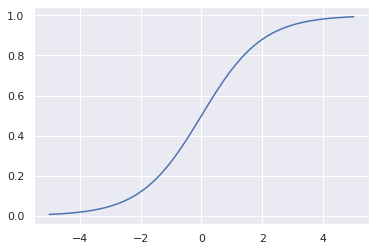

In [108]:
x = np.linspace(-5,5,50)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

## 同時確率

$ Px(x,y) $

In [99]:
argvs = sys.argv
P = np.array([[0.15,0.1,0.1,0.01],[0.1,0.2,0.05,0.04],[0.05,0,0.1,0.1]])
Y = ["男子","女子","教員"]
X = [" ","自転車","徒歩","電車","車"]

df = pd.DataFrame(P, columns=X[1:],index=Y)
df['s_sum'] = df.sum(axis=1)
df= pd.concat([df,pd.DataFrame(df.sum(axis=0),columns=['G_ttl']).T])
df

,自転車,徒歩,電車,車,s_sum
男子,0.15,0.1,0.10,0.01,0.36
女子,0.10,0.2,0.05,0.04,0.39
教員,0.05,0.0,0.10,0.10,0.25
G_ttl,0.30,0.3,0.25,0.15,1.00


In [100]:
[df[col].sum() for col in df]

[0.600, 0.600, 0.500, 0.300, 2.000]

In [101]:
for c in df:
  print(c)

自転車
徒歩
電車
車
s_sum


In [102]:
for j in range(3):  
  for i in range(4):
    conditional_probability = P[j][i]/sum(P[j])
    print(conditional_probability)
  print("")

0.4166666666666667
0.2777777777777778
0.2777777777777778
0.02777777777777778

0.25641025641025644
0.5128205128205129
0.12820512820512822
0.10256410256410256

0.2
0.0
0.4
0.4



In [103]:
Pr_y = [0 for i in range(len(P))]
for i, y in enumerate(P):
  for j, x in enumerate(y):
    Pr_y[i] += x
print("Pr(y) : ", Pr_y)


Pr_x = [0 for i in range(len(P[0]))]
for i, y in enumerate(P):
  for j, x in enumerate(y):
    Pr_x[j] += x
print("Pr(x) : ", Pr_x)

total = 0

for y in range(len(P)):
  print("y = ",y)

  conditional_probability = P[y][i]/sum(P[y])
  likelyhood = conditional_probability
  prior = Pr_y[y]
  evidence = Pr_x[2]
  bayes = likelyhood*prior/evidence
  total += bayes
  print("likelyhood : ", likelyhood)
  print("prior ; ", prior)
  print("evidence : ", evidence)
  print("bayes : ", bayes)
  

Pr(y) :  [0.36, 0.39, 0.25]
Pr(x) :  [0.3, 0.30000000000000004, 0.25, 0.15000000000000002]
y =  0
likelyhood :  0.2777777777777778
prior ;  0.36
evidence :  0.25
bayes :  0.4
y =  1
likelyhood :  0.12820512820512822
prior ;  0.39
evidence :  0.25
bayes :  0.20000000000000004
y =  2
likelyhood :  0.4
prior ;  0.25
evidence :  0.25
bayes :  0.4
